In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.09 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.14 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.16 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [53]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)

In [54]:
# write your code to implement SGD as per the above instructions
def sigmoid(z):
    return 1/(1 + np.e**(-z))
z_train = np.dot(X_train, w) + b
z_test = np.dot(X_test, w) + b
h_train = sigmoid(z_train)
h_test = sigmoid(z_test)
# please choose the number of iternations on your own

In [55]:
def initial_loss(h, y):
    return -np.mean((y * np.log(h) + (1-y) * np.log(1 - h)) - alpha*np.dot(w.T,w))
    
#loss on X_train
initial_log_loss_X_train = initial_loss(h_train, y_train)
print(initial_log_loss_X_train)
#loss on X_test
initial_log_loss_X_test = initial_loss(h_test, y_test)
print(initial_log_loss_X_test)

0.6931471805599453
0.6931471805599453


In [56]:
#Initializing Sigmoid function
def sigmoid_(z):
    return 1/(1 + np.exp(-z))


#Calculation the optimal 'w', 'log_losses' optimal 'b' for training data
def log_loss_calculator(feature, class_label, w, b, epoch_range,log_loss_lst):
    for epoch in range(epoch_range):
        z = np.matmul(feature, w) + b
        h = sigmoid_(z)
        log_loss_lst.append(initial_loss(h, class_label))
        dz = h - class_label
        dw = 1/len(class_label)*np.matmul(feature.T, dz)
        db = np.sum(dz)
        #w = (1-(alpha*eta0/y_train.shape[0]))*w +alpha*np.matmul(X_train.T,(h_train-y_train))
        #b = b+alpha*(y_train-h_train)
        w = w - eta0*dw
        b = b - eta0*db
    return log_loss_lst,w,b

In [50]:
#For train dataset
log_loss_lst_train = []
epoch_range = 260000
log_loss_lst_train,w_optimal_train, b_optimal_train = log_loss_calculator(X_train, y_train, w, b, epoch_range, log_loss_lst_train)

In [51]:
#printing the first 10 values of log loss to show the decrease in it
print(log_loss_lst_train[:10])
print("*"*50)
#printing the last value from the list of log-loss
print(log_loss_lst_train[-1])
print("*"*50)
#printing the optimal 'w' and optimal 'b'
print(w_optimal_train)
print("*"*50)
print(b_optimal_train)

[0.6931471805599453, 0.6135457850354855, 0.6125637888540053, 0.6124763997083565, 0.612422279689771, 0.6123695974856563, 0.6123170040782807, 0.6122644407581732, 0.612211904934566, 0.6121593964708294]
**************************************************
0.3781324237916919
**************************************************
[-4.23302797e-01  1.85522132e-01 -1.45891387e-01  3.39903256e-01
 -2.15278877e-01  5.61635950e-01 -4.44418304e-01 -9.04116448e-02
  2.16530200e-01  1.79595930e-01  1.93448690e-01 -4.58949556e-04
 -8.37329712e-02  3.37253746e-01  2.71511020e-02]
**************************************************
-0.8897160210299281


In [57]:
#For test dataset
log_loss_lst_test = []
log_loss_lst_test,w_optimal_test, b_optimal_test = log_loss_calculator(X_test, y_test, w, b, epoch_range,log_loss_lst_test)

In [58]:
#printing the first 10 values of log loss to show the decrease in it
print(log_loss_lst_test[:10])
print("*"*50)
#printing the last value from the list of log-loss
print(log_loss_lst_test[-1])
print("*"*50)
#printing the optimal 'w' and optimal 'b'
print(w_optimal_test)
print("*"*50)
print(b_optimal_test)
#(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
#          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
#          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
# (1, 15),
# array([-0.8531383]))
#0.378585

[0.6931471805599453, 0.6514384896549886, 0.6315343629257231, 0.621812209980934, 0.616934583861651, 0.61442411423751, 0.6130989718220933, 0.6123793188027484, 0.6119737782072664, 0.6117331120411457]
**************************************************
0.3798757910223247
**************************************************
[-0.42112671  0.18207895 -0.14405493  0.32943106 -0.1957375   0.55115145
 -0.44722245 -0.07378325  0.21936666  0.18057952  0.19275909 -0.00489289
 -0.07629145  0.31962955  0.03113148]
**************************************************
-0.8960515829995543


In [52]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w_optimal_train-clf.coef_, b_optimal_train-clf.intercept_

(array([[ 6.41195419e-05,  4.64801975e-05,  2.69896957e-03,
         -1.54081352e-03, -7.09217449e-03,  1.47016482e-03,
          8.00652112e-03,  3.67648331e-03,  7.25700043e-03,
         -1.24533062e-03, -3.60321521e-03, -4.67810663e-03,
         -4.12927529e-03, -1.27426987e-03,  4.48389243e-03]]),
 array([-0.03657772]))

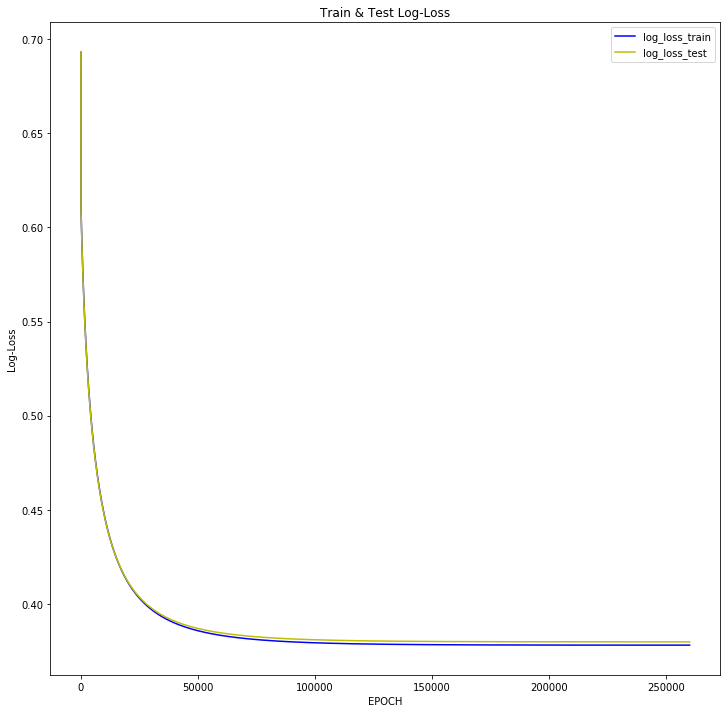

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.plot(range(0,epoch_range), log_loss_lst_train, 'b', label='log_loss_train')
plt.plot(range(0,epoch_range), log_loss_lst_test, 'y', label = 'log_loss_test')
plt.legend()
plt.xlabel("EPOCH")
plt.ylabel("Log-Loss")
plt.title("Train & Test Log-Loss")

plt.show()

In [71]:
def sigmoid(w,x,b): 
    return 1/(1+np.e**(-(np.dot(x,w)+b)))

In [72]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w_optimal_train,b_optimal_train,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w_optimal_test,b_optimal_test,X_test))/len(X_test))

0.95056
0.94928
